In [1]:
import pandas as pd
import os
import glob
import os 
import numpy as np

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns



# Editable text and proper LaTeX fonts in illustrator
matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True

# Editable fonts. 42 is the magic number
matplotlib.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
matplotlib.rcParams['mathtext.fontset'] = 'cm'
%matplotlib inline

sns.set(style='whitegrid', context='paper')


data_ingest_folder = os.path.join('..', '00_data_ingest' )
folder = os.path.join(data_ingest_folder, '13_ngenes_ncells_facs')

palette_folder = os.path.join(data_ingest_folder, '15_color_palette')
colors = pd.read_csv(os.path.join(palette_folder, 'tissue_colors.csv'), index_col=0, squeeze=True)
colors

Aorta                #1f77b4
Bladder              #aec7e8
Brain_Myeloid        #ff7f0e
Brain_Non-Myeloid    #ffbb78
Large_Intestine      #2ca02c
Diaphragm            #98df8a
Fat                  #d62728
Heart                #ff9896
Kidney               #9467bd
Liver                #c5b0d5
Lung                 #8c564b
Mammary_Gland        #c49c94
Marrow               #e377c2
Limb_Muscle          #f7b6d2
Pancreas             #7f7f7f
Skin                 #c7c7c7
Spleen               #bcbd22
Thymus               #dbdb8d
Tongue               #17becf
Trachea              #9edae5
Name: color, dtype: object

In [2]:

globber = os.path.join(folder, '*_nreads_ngenes.csv')

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)

print(nreads_ngenes.shape)
print(len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(44949, 4)
20


,nGene,nReads,orig.ident,tissue
A1.MAA000907.3_11_M.1.1,1492,59288,Liver,Liver
A1.MAA100039.3_11_M.1.1,8885,1369546,Liver,Liver
A1.MAA100138.3_56_F.1.1,7168,1838345,Liver,Liver
A1.MAA100140.3_57_F.1.1,6938,1664289,Liver,Liver
A10.MAA000907.3_11_M.1.1,2279,306456,Liver,Liver


In [3]:
nreads_ngenes['log10 nReads'] = np.log10(nreads_ngenes['nReads'])

In [6]:
# Replace underscores with spaces for LaTeX happiness
nreads_ngenes['tissue'] = nreads_ngenes['tissue'].str.replace('_', ' ')
colors.index = colors.index.str.replace('_', ' ')

In [7]:
tissues = sorted(nreads_ngenes['tissue'].unique())
tissues

['Aorta',
 'Bladder',
 'Brain Myeloid',
 'Brain Non-Myeloid',
 'Diaphragm',
 'Fat',
 'Heart',
 'Kidney',
 'Large Intestine',
 'Limb Muscle',
 'Liver',
 'Lung',
 'Mammary Gland',
 'Marrow',
 'Pancreas',
 'Skin',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

In [8]:
kwargs = dict(data=nreads_ngenes, row='tissue', facet_kws=dict(sharex=True),
               row_order=tissues, palette=colors, xlabel_suffix='')

In [9]:
n_cells_per_tissue = nreads_ngenes.groupby('tissue').size().reset_index()
n_cells_per_tissue = n_cells_per_tissue.rename(columns={0: 'n_cells'})
n_cells_per_tissue

,tissue,n_cells
0,Aorta,408
1,Bladder,1378
2,Brain Myeloid,4455
3,Brain Non-Myeloid,3401
4,Diaphragm,870
5,Fat,4967
6,Heart,4365
7,Kidney,519
8,Large Intestine,3938
9,Limb Muscle,1090


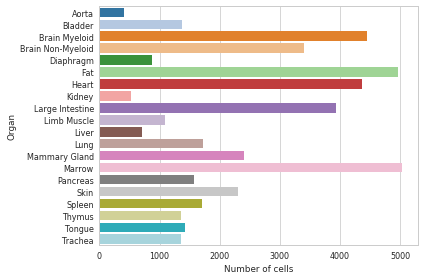

In [13]:
fig, ax = plt.subplots()
sns.barplot(x='n_cells', y='tissue', data=n_cells_per_tissue, palette=colors, order=tissues)
ax.set(xlabel='Number of cells')
ax.set(ylabel='Organ')
fig.tight_layout()
fig.savefig('figure1b_barplot_n_cells_per_tissue.pdf')